# Getting Started

ModeResult(mode=array([86]), count=array([3], dtype=int64))
94.0


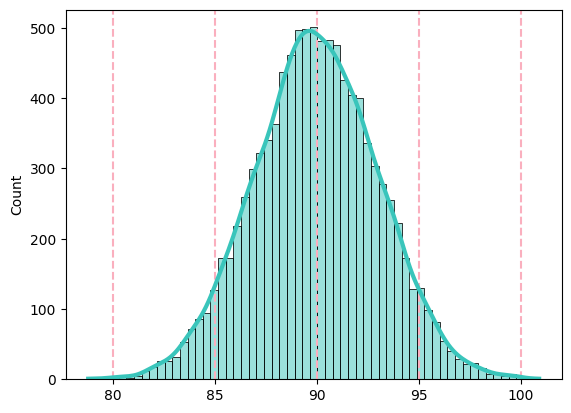

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# 计算众数
speed = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

x = stats.mode(speed, keepdims=True)
print(x)

# 计算分位数
y = np.percentile(speed, 75)
print(y)

# 生成随机变量并作图
X = np.random.normal(90, 3, 10000)

sns.histplot(X, color='#39C5BB', kde=True, line_kws={'linewidth': 3})

plt.grid(axis='x', color='#FAAFBE', ls='--', lw=1.5)

plt.show()

# Regression

## Linear Regression

-0.76 0.003
85.59


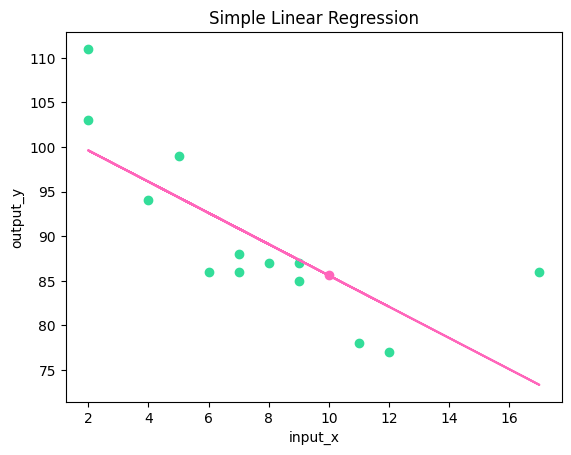

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 生成数据
x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

# 获取线性回归结果的相关参数
slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r.round(2), p.round(3))  # 相关系数r


# 构建预测模型方程
def myfunc(x):
    return slope*x + intercept


# 对原数据应用预测模型
mymodel = list(map(myfunc, x))

# 预测新值
speed = myfunc(10).round(2)
print(speed)

# 可视化
plt.scatter(x, y, color=(51/255, 221/255, 153/255))
plt.scatter(10, speed, color=(255/255, 102/255, 187/255))
plt.plot(x, mymodel, color=(255/255, 102/255, 187/255))

plt.title('Simple Linear Regression')
plt.xlabel('input_x')
plt.ylabel('output_y')

plt.show()

[[2.03900874]
 [1.9940619 ]]
[[2.03900874 1.9940619 ]]


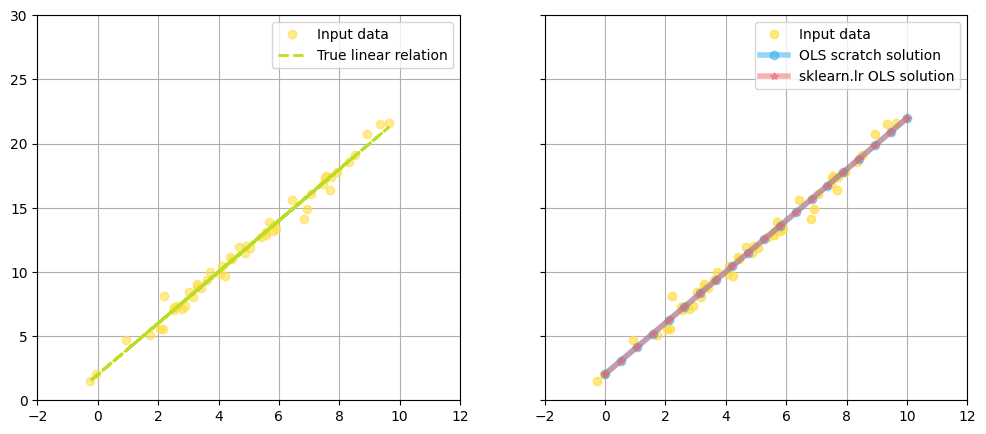

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 生成数据集
np.random.seed(666)
n = 50
X_ = np.random.normal(5, 3, n).reshape(-1, 1)

# 真实参数
beta_0 = 2
beta_1 = 2

# 生成输出值
y_true = beta_0 + beta_1 * X_
noise = np.random.randn(n, 1) * 0.5  # 添加噪声
y = y_true + noise

# 为数据集添加截距列，以便线性回归
X = np.c_[np.ones((n, 1)), X_]

# 直接用最小二乘公式求解
beta_OLS_scratch = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_OLS_scratch)

# 用sklearn中的LinearRegression
lr = LinearRegression(fit_intercept=False).fit(X, y)
print(lr.coef_)

# 创建新数据用于预测
X_new = np.linspace(0, 10, 20).reshape(-1, 1)
X_new = np.c_[np.ones((20, 1)), X_new]

# 预测y值
y_new_OLS = X_new @ beta_OLS_scratch
y_new_lr = lr.predict(X_new)

# 可视化
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))

ax1.plot(X_, y, "o", label="Input data", color=(
    255/255, 221/255, 68/255), alpha=0.6)
ax1.plot(X_, y_true, '--', label='True linear relation', lw=2, color='#BBDD22')
ax1.legend()

ax2.plot(X_, y, 'o', label='Input data', color=(
    255/255, 221/255, 68/255), alpha=0.7)
ax2.plot(X_new[:, 1], y_new_OLS, '-o', alpha=0.5, lw=4,
         label="OLS scratch solution", color=(51/255, 170/255, 238/255))
ax2.plot(X_new[:, 1], y_new_lr, '-*', alpha=0.5, lw=4,
         label="sklearn.lr OLS solution", color=(238/255, 102/255, 102/255))
ax2.legend()

ax1.set_xlim(-2, 12)
ax1.set_ylim(0, 30)

ax1.grid()
ax2.grid()

plt.show()

## Linear Regerssion - Bad Example

r = 0.013
p = 0.956


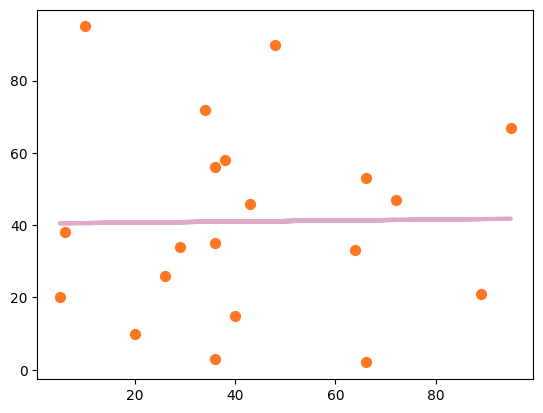

In [7]:
import numpy as np
from scipy import stats

x = np.array([89, 43, 36, 36, 95, 10, 66, 34, 38, 20,
             26, 29, 48, 64, 6, 5, 36, 66, 72, 40])
y = np.array([21, 46, 3, 35, 67, 95, 53, 72, 58, 10,
             26, 34, 90, 33, 38, 20, 56, 2, 47, 15])

slope, intercept, r, p, std_err = stats.linregress(x, y)
print('r =', r.round(3))
print('p =', p.round(3))


def myfunc(x):
    return slope*x + intercept


mymodel = myfunc(x)

plt.scatter(x, y, color=(255/255, 119/255, 34/255), s=50)
plt.plot(x, mymodel, color=(221/255, 170/255, 204/255), linewidth=3)

plt.show()

## Polynomial Regression

polynomial coefficient: [-3.0000e-02  1.3400e+00 -1.5540e+01  1.1377e+02]
R2 = 0.9432
prediceted_speed = 88.87


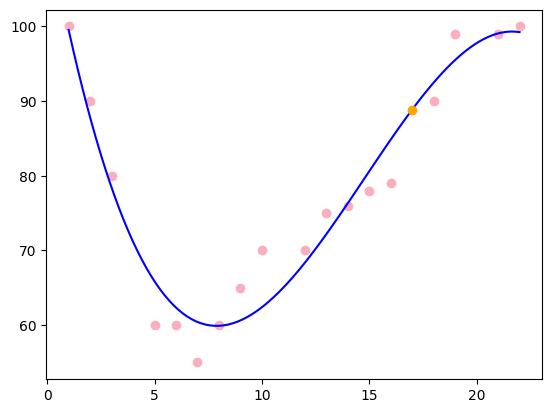

In [24]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22])
y = np.array([100, 90, 80, 60, 60, 55, 60, 65, 70,
             70, 75, 76, 78, 79, 90, 99, 99, 100])

# np.polyfit拟合多项式，返回多项式系数数组，第一个元素为最高次项系数。
coefficient = np.polyfit(x, y, 3)
print('polynomial coefficient:', coefficient.round(2))

# np.poly1d将多项式系数数组转换为多项式对象，其可以像函数一样进行调用，输入x值即可计算对应的y值
mymodel = np.poly1d(coefficient)
print('R2 =', r2_score(y, mymodel(x)).round(4))

# 预测新值
speed = mymodel(17)
print('prediceted_speed =', speed.round(2))

# 创建横坐标点列以绘制回归曲线
myline = np.linspace(1, 22, 100)

# 可视化
plt.scatter(x, y, color=(250/255, 175/255, 190/255))
plt.plot(myline, mymodel(myline), color='blue')
plt.plot(17, speed, 'o', color=(255/255, 165/255, 0/255), lw=2)

plt.show()

## Logistic Regression

[0]
[[4.03557295]]
[[0.60749168]
 [0.19267555]
 [0.12774788]
 [0.00955056]
 [0.08037781]
 [0.0734485 ]
 [0.88362857]
 [0.77901203]
 [0.88924534]
 [0.81293431]
 [0.57718238]
 [0.96664398]]


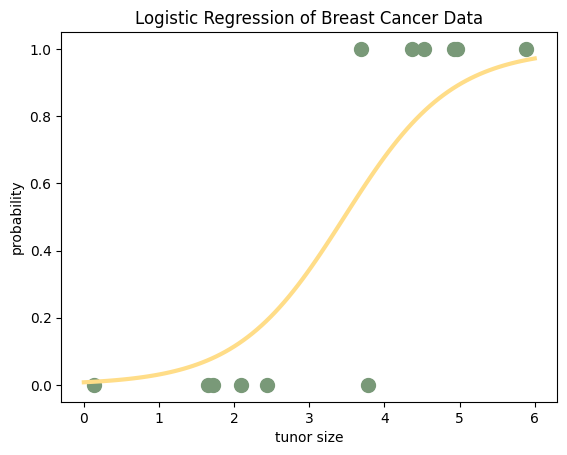

In [25]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

## 示例数据，预测肿瘤是良性还是恶性

X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 
				 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)  # 肿瘤大小（cm）
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # 0为良性，1为恶性

logr = linear_model.LogisticRegression()
logr.fit(X, y)

# 预测
predicted = logr.predict(np.array([3.46]).reshape(-1, 1))
print(predicted)

# 对数odds和odds
log_odds = logr.coef_
odds = np.exp(log_odds)
print(odds)

# 输出预测概率
def logit2prob(logr, x):
	log_odds = logr.coef_ * x + logr.intercept_
	odds = np.exp(log_odds)
	probability = odds / (1 + odds)
	return probability

print(logit2prob(logr, X))

# 可视化
line_input = np.linspace(0, 6, 100).reshape(-1,1)
line_output = logit2prob(logr, line_input)

plt.scatter(X, y, color='#799978', s=100)
plt.plot(line_input, line_output, color='#FFDD88', lw=3)

plt.title("Logistic Regression of Breast Cancer Data")
plt.xlabel('tunor size')
plt.ylabel('probability')

plt.show()

## Kernel Ridge Regression

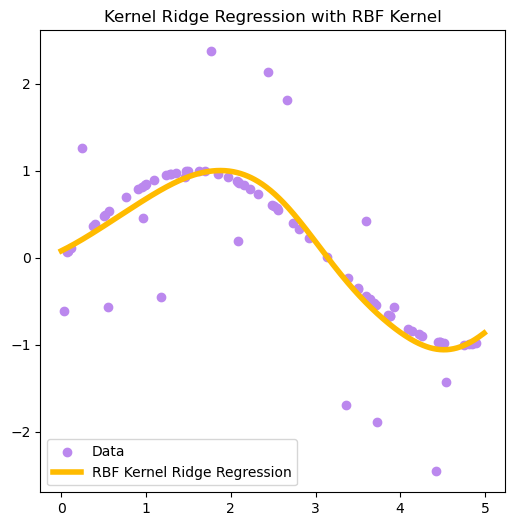

In [69]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

# 构造训练集
np.random.seed(666)

X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# 对y中元素以间隔为5进行修改，模拟噪声
y[::5] = y[::5] + 3 * (0.5 - np.random.rand(16))

# 构造测试集
X_test = np.arange(0, 5, 0.01)[:, np.newaxis]

# 核岭回归，核函数为RBF
kr = KernelRidge(kernel='rbf',
                 alpha=1,  # 正则化系数
                 gamma=1)  # RBF核函数宽度
kr.fit(X, y)

# 测试集预测
y_rbf = kr.predict(X_test)

# 可视化
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(X, y, color=(187/255, 136/255, 238/255), label='Data')
ax.plot(X_test, y_rbf, color=(255/255, 187/255, 0/255),
        lw=4, label='RBF Kernel Ridge Regression')
ax.set_title('Kernel Ridge Regression with RBF Kernel')
ax.legend()

plt.show()

## Mutiple Regression

In [70]:
import pandas as pd
from sklearn import linear_model

# 读取数据
df = pd.read_csv('data.csv')
print(df.head())

# 设置模型输入与输出
X = df[['Weight', 'Volume']]
y = df['CO2']

# 线性回归
regr = linear_model.LinearRegression()
regr.fit(X, y)

# 输出回归系数
print(regr.coef_.round(4))

# 预测新值
test_input = pd.DataFrame([[2300, 1300], [3300, 1300], [2300, 2300]],
                          columns=['Weight', 'Volume'])

predicted_CO2 = regr.predict(test_input)
print(predicted_CO2.round(2))

          Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105
[0.0076 0.0078]
[107.21 114.76 115.01]


# Decision Tree

## Simple Decision Tree

[1]
[0]
[1] means 'GO'
[0] means 'NO'


D:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


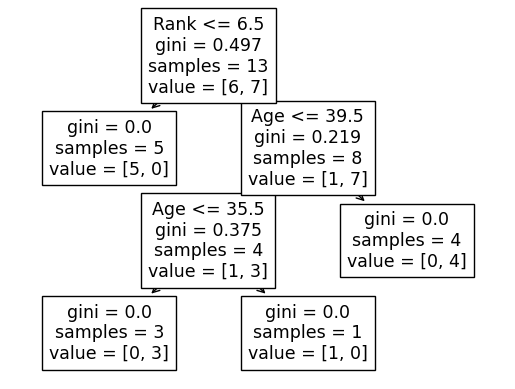

In [16]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('DT_data.csv')

# 将分类变量转化为数值变量
d1 = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d1)

d2 = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d2)

# 获取输入特征
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

# 创建决策树分类器实例
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

# 展示决策树
tree.plot_tree(dtree, feature_names=features)

# 预测
print(dtree.predict([[40, 10, 7, 1]]))
print(dtree.predict([[40, 10, 6, 1]]))
print("[1] means 'GO'")
print("[0] means 'NO'")

## Bagging

### Generating Bagging Classifier

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222
scores: [0.8222222222222222, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333]


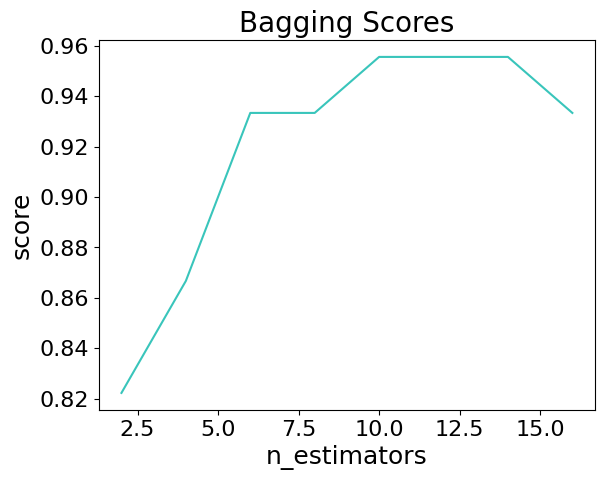

In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

# 读取数据
data = datasets.load_wine(as_frame=True)

# 数据输入与输出
X = data['data']
y = data['target']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=22)

# 创建决策树实例
dtree = DecisionTreeClassifier(random_state=22)

# 拟合数据
dtree.fit(X_train, y_train)

y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Train data accuracy:", accuracy_train)
print("Test data accuracy:", accuracy_test)

# 创建不同分类器数量
estimator_range = [2, 4, 6, 8, 10, 12, 14, 16]

models = []
scores = []

for n_estimators in estimator_range:
    clf = BaggingClassifier(n_estimators=n_estimators,
                            random_state=22)  # 创建bagging分类器

    clf.fit(X_train, y_train)  # 拟合

    models.append(clf)
    scores.append(accuracy_score(
        y_true=y_test, y_pred=clf.predict(X_test)))  # 预测准确度

print('scores:', scores)

# 可视化
plt.plot(estimator_range, scores, color='#39C5BB')

plt.title("Bagging Scores", fontsize=20)
plt.xlabel('n_estimators', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.tick_params(labelsize=16)

plt.show()

### Out-of-Bag Metric

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame=True)

X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

# 包外估计
oob_model = BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)

oob_model.fit(X_train, y_train)

print(oob_model.oob_score_)

0.9398496240601504


### Generating Decision Trees from Bagging Classifier

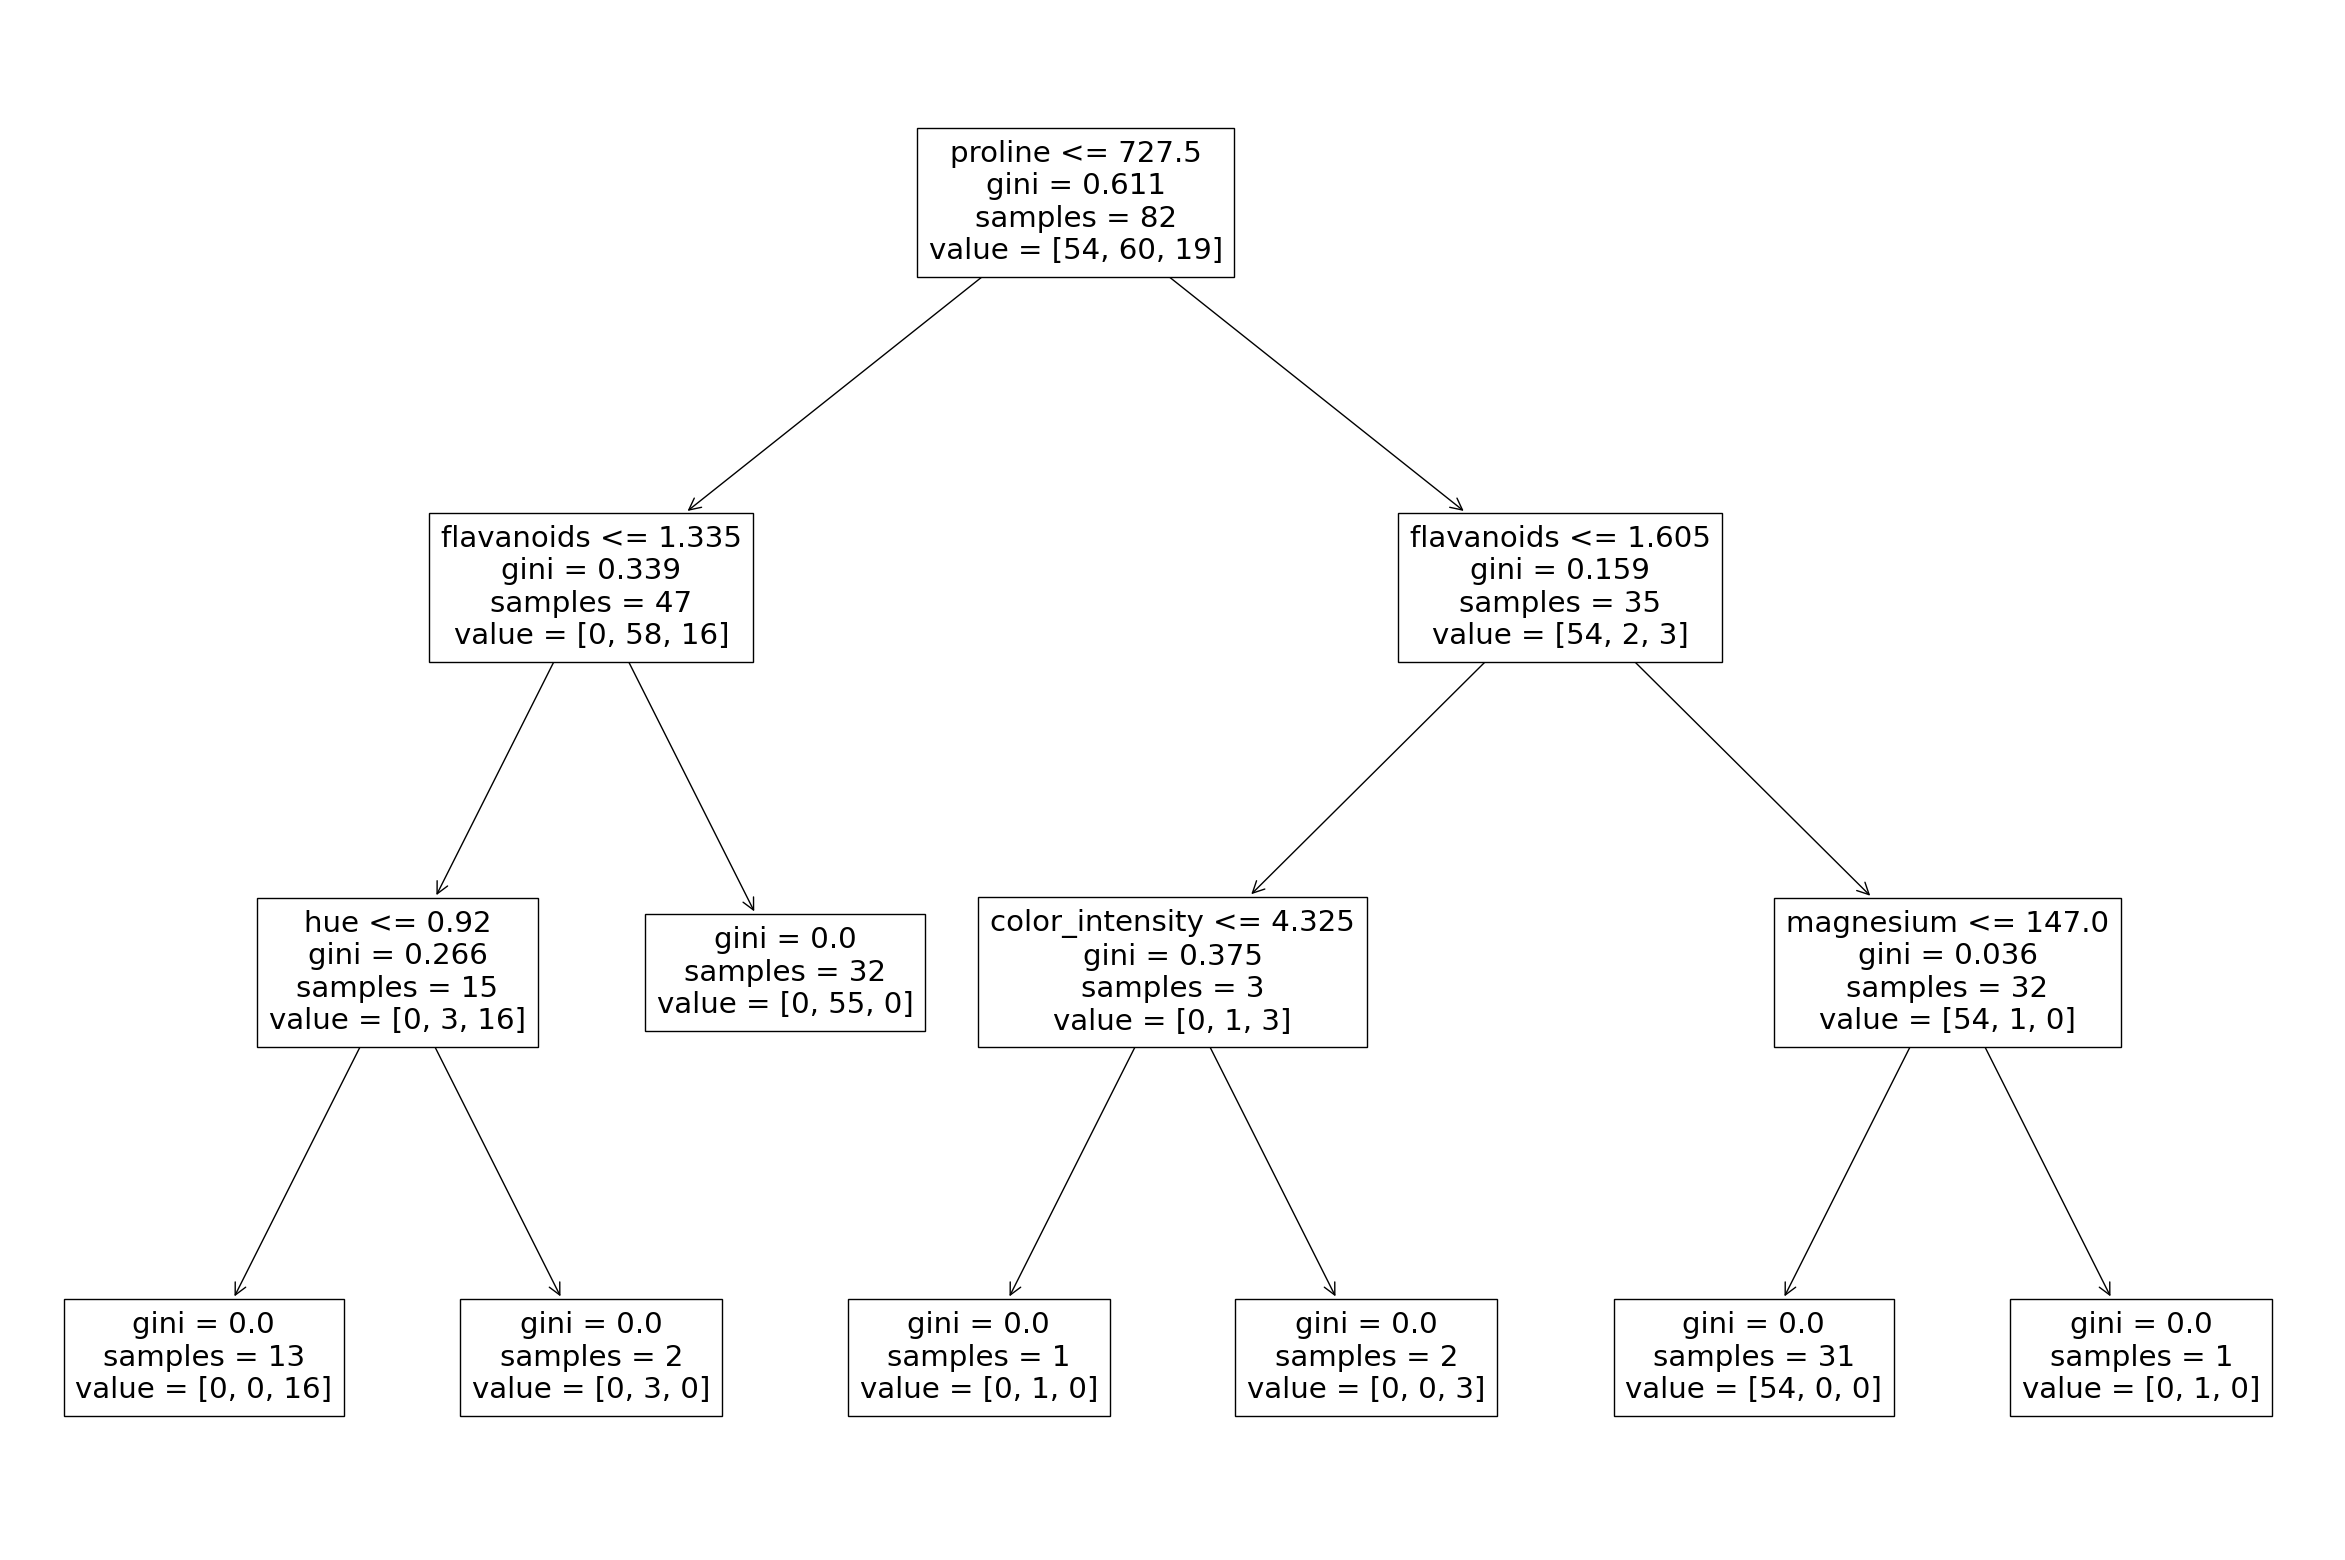

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

clf = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))
plot_tree(clf.estimators_[0], feature_names=X.columns)

plt.show()

# Support Vector Machine(SVM)

0.9866666666666667
1.0
[1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0]


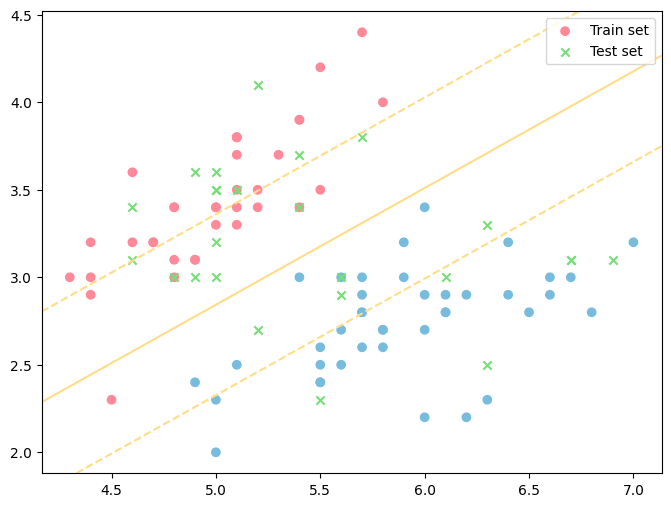

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# 加载数据
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
X = X[y < 2, :2]
y = y[y < 2]

# 标准化
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=666)

# 拟合数据
svc = LinearSVC(C=1, dual=True)
svc.fit(X_train, y_train)

# 训练集准确度
print(svc.score(X_train, y_train))

# 测试集准确度
print(svc.score(X_test, y_test))

# 预测结果
prediction = svc.predict(X_test)
print(prediction)

# 可视化
plt.figure(figsize=(8, 6))

# 绘制训练集数据点
colors = ListedColormap(['#FF8899', '#77BBDD'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            cmap=colors, label='Train set')

# 绘制测试集数据点
plt.scatter(X_test[:, 0], X_test[:, 1], c='#77DD77', marker='x', label='Test set')

# 获取x轴与y轴范围
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创建网格来评估模型
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

# 绘制决策边界和间隔边界
ax.contour(XX, YY, Z, colors='#FFDD88',
           levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.legend()
plt.show()

# K-nearest neighbors(KNN)

prediction(k=1): [0]
prediction(k=5): [1]


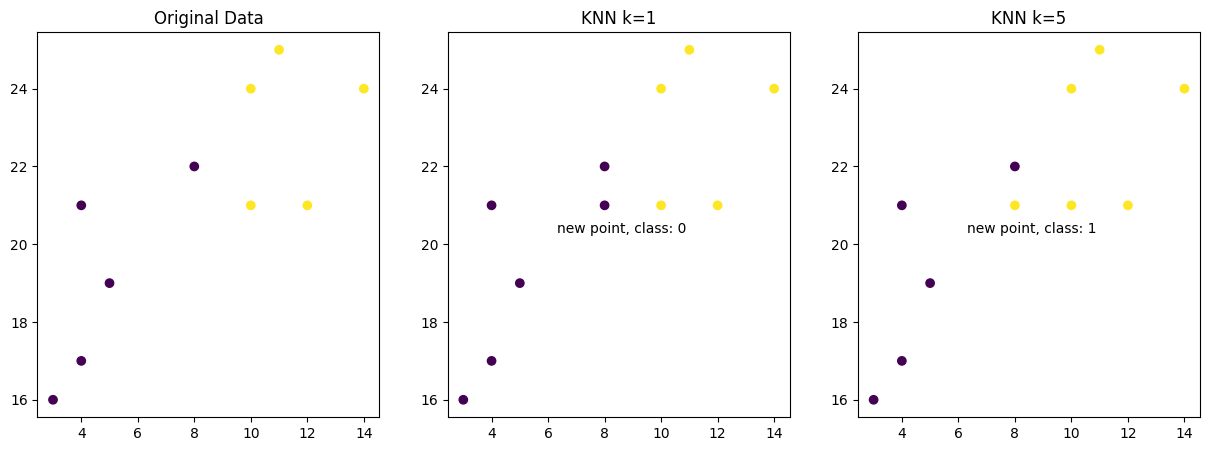

In [62]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 创建数据点
x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]  # 数据点分类

data = list(zip(x, y))

# 创建knn实例
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_5 = KNeighborsClassifier(n_neighbors=5)

# 模型拟合
knn_1.fit(data, classes)
knn_5.fit(data, classes)

# 预测
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction_1 = knn_1.predict(new_point)
prediction_5 = knn_5.predict(new_point)
print(f'prediction(k=1): {prediction_1}')
print(f'prediction(k=5): {prediction_5}')

# 可视化
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(x, y, c=classes)
ax1.set_title('Original Data')

ax2.scatter(x + [new_x], y + [new_y], c=classes + [prediction_1[0]])
ax2.set_title('KNN k=1')
ax2.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction_1[0]}")

ax3.scatter(x + [new_x], y + [new_y], c=classes + [prediction_5[0]])
ax3.set_title('KNN k=5')
ax3.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction_5[0]}")

plt.show()

# Clustering

## Hierarchical Clustering

[0 0 1 0 0 1 1 0 1 1]


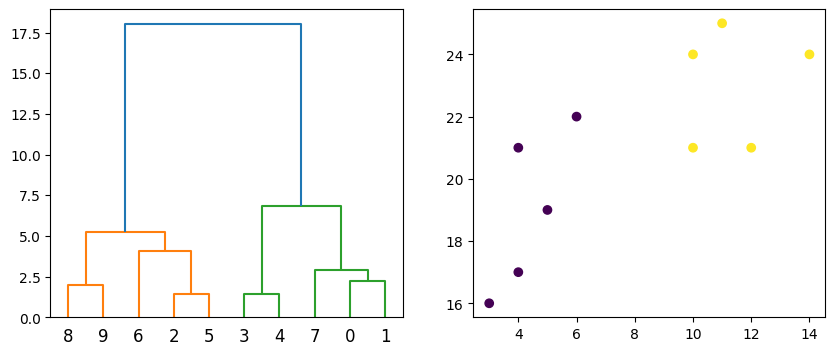

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 数据
x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

# 数据转换为二维坐标点
data = list(zip(x, y))

# 使用linkage方法，用ward法聚类，距离度量为欧式距离
linkage_data = linkage(data, method='ward', metric='euclidean')

# 创建AgglomerativeClustering实例，用ward法聚类，簇数为2，距离度量为欧式距离
hierarchical_cluster = AgglomerativeClustering(
    n_clusters=2, metric='euclidean', linkage='ward')

# 拟合数据
labels = hierarchical_cluster.fit_predict(data)

# 每个数据所属的簇
print(labels)

# 可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

dendrogram(linkage_data, ax=ax1)  # 树状图

ax2.scatter(x, y, c=labels)

plt.show()

## K-means

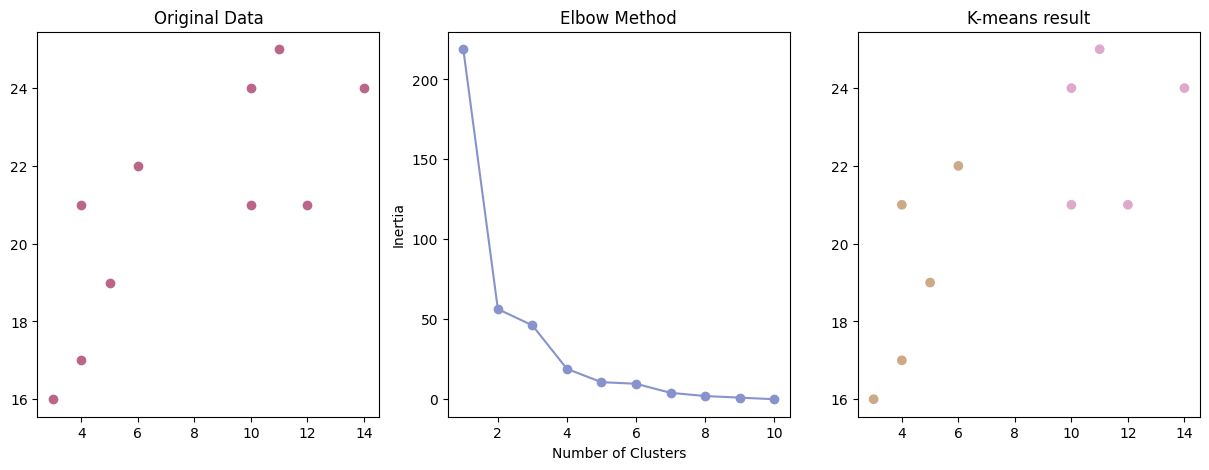

In [53]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 创建x轴，y轴数据
x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

# 创建二维数据点
data = list(zip(x, y))

# 数据点可视化
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.scatter(x, y, color='#BB6688')
ax1.set_title('Original Data')

# 簇内平方和
inertias = []

# 选取不同k值聚类
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)  # 设置k值（簇数）
    kmeans.fit(data)  # 模型拟合
    inertias.append(kmeans.inertia_)

# 可视化Elbow图
ax2.plot(range(1, 11), inertias, marker='o', color='#8892CC')
ax2.set_title('Elbow Method')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Inertia')

# 选择k=2训练
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.labels_

# 可视化聚类结果
colors = ['#CCAA88' if label == 0 else '#DDAACC' for label in labels]

ax3.scatter(x, y, c=colors)
ax3.set_title('K-means result')

plt.show()

# Methods

## Train / Test

R2 on train = 0.7989
R2 on test = 0.8087
predict value for input=6.4: 369.28


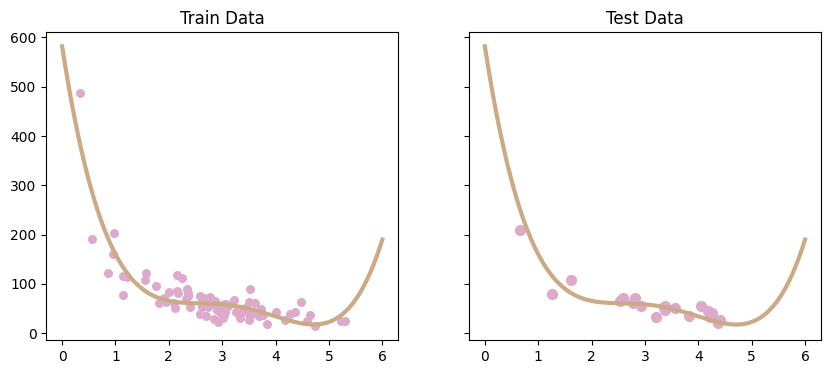

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 生成数据
np.random.seed(2)
x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

# 划分训练集与测试集
train_x = x[:80]
train_y = y[:80]
test_x = x[80:]
test_y = y[80:]

# 多项式回归
mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

# 获取训练集R2值
train_r2 = r2_score(train_y, mymodel(train_x))
print('R2 on train =', train_r2.round(4))

# 获取测试集R2值
test_r2 = r2_score(test_y, mymodel(test_x))
print('R2 on test =', test_r2.round(4))

# 预测新值
predict = mymodel(6.4)
print('predict value for input=6.4:', predict.round(2))

# 可视化
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 4))

# 绘制训练集散点图
ax1.scatter(train_x, train_y, s=30, color=(221/255, 170/255, 204/255))
ax1.set_title("Train Data")

# 绘制测试集散点图
ax2.scatter(test_x, test_y, s=50, color=(221/255, 170/255, 204/255))
ax2.set_title("Test Data")

# 创建横坐标点列以绘制回归曲线
myline = np.linspace(0, 6, 200)

ax1.plot(myline, mymodel(myline), color=(
    204/255, 170/255, 136/255), lw=3)
ax2.plot(myline, mymodel(myline), color=(
    204/255, 170/255, 136/255), lw=3)

plt.show()

## Scaler

In [38]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# 创建StandardScaler实例
scale = StandardScaler()

# 读取数据
df = pandas.read_csv("data.csv")

# 训练输入与输出
X = df[['Weight', 'Volume']]
y = df['CO2']

#标准化
scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

# 预测输入标准化
scaled = scale.transform([[2300, 1.3]])

# 预测
predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[97.07204485]


D:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Grid Search

In [27]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# 加载数据
iris = datasets.load_iris()

# 训练输入与输出
X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter=10000)

# 设置正则化参数列表
C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

# 存储模型得分
scores = []

# 网络搜索最佳参数
for choice in C:
    logit.set_params(C=choice)  # 设置正则化参数
    logit.fit(X, y)
    score = logit.score(X, y)  # 模型得分
    scores.append(score)

print(scores)

[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


## One-hot Encoding

In [36]:
import pandas as pd
from sklearn import linear_model

# 读取数据
cars = pd.read_csv('data.csv')

# One-hot编码
ohe_cars = pd.get_dummies(cars[['Car']])
ohe_cars = ohe_cars.astype(int)  # 将Bool值转化为0,1

# 训练输入与训练输出
X = pd.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
y = cars['CO2']

# 线性回归
regr = linear_model.LinearRegression()
regr.fit(X, y)

# 预测
predictedCO2 = regr.predict([[2300, 1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

print(predictedCO2)


[122.45153299]


D:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Cross Validation

### K-Fold

In [6]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# 读取数据
X, y = datasets.load_iris(return_X_y=True)

# 使用决策树
clf = DecisionTreeClassifier(random_state=64)

# 创建KFold实例，设置k=5
k_folds = KFold(n_splits=5)

# 交叉验证得分
scores = cross_val_score(clf, X, y, cv=k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.83333333]
Average CV Score:  0.9199999999999999
Number of CV Scores used in Average:  5


### Stratified K-Fold

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

# 创建分层K-Fold实例
sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  5


### Leave-One-Out (LOO)

In [8]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

# 创建留一法实例
loo = LeaveOneOut()

scores = cross_val_score(clf, X, y, cv=loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))



Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.94
Number of CV Scores used in Average:  150


### Leave-P-Out (LPO)

In [9]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeavePOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

lpo = LeavePOut(p=2)

scores = cross_val_score(clf, X, y, cv=lpo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))



Cross Validation Scores:  [1. 1. 1. ... 1. 1. 1.]
Average CV Score:  0.9382997762863534
Number of CV Scores used in Average:  11175


### Shuffle Split

In [10]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)

scores = cross_val_score(clf, X, y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))



Cross Validation Scores:  [0.97777778 0.88888889 0.91111111 0.97777778 1.        ]
Average CV Score:  0.9511111111111111
Number of CV Scores used in Average:  5


## Confusion Matrix

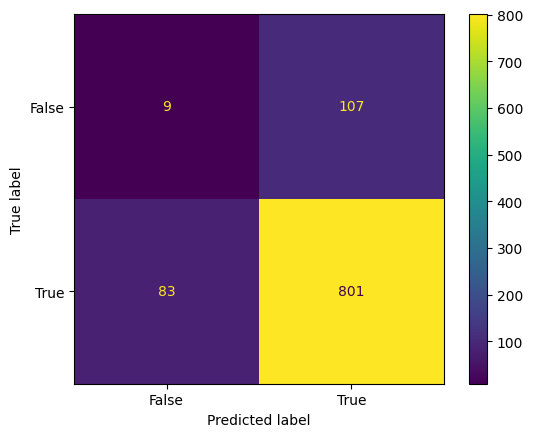

{'Accuracy': 0.81, 'Precision': 0.882, 'Sensitivity': 0.906, 'Specificity': 0.078, 'F1_score': 0.894}


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

actual = np.random.binomial(1, 0.9, size=1000)
predicted = np.random.binomial(1, 0.9, size=1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                            display_labels=[False, True])

cm_display.plot()

plt.show()

Accuracy = metrics.accuracy_score(actual, predicted)

Precision = metrics.precision_score(actual, predicted).round(3)

Sensitivity = metrics.recall_score(actual, predicted).round(3)

Specificity = metrics.recall_score(actual, predicted, pos_label=0).round(3)

F1_score = metrics.f1_score(actual, predicted).round(3)

result = {"Accuracy": Accuracy,
          "Precision": Precision,
          "Sensitivity": Sensitivity,
          "Specificity": Specificity,
          "F1_score": F1_score}

print(result)

## AUC-ROC Curve

accuracy score: 0.95
Confusion matrix:
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0
model 1 AUC score: 0.5


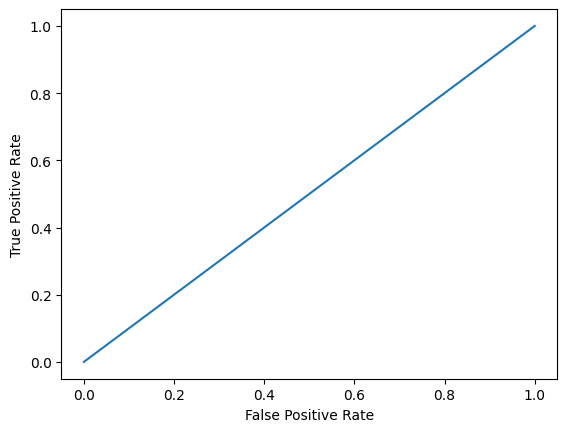

In [20]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

n = 10000
ratio = 0.95

n_0 = int((1-ratio)*n)
n_1 = int(ratio*n)

y = np.array([0] * n_0 + [1] * n_1)

# 将所有值预测为1
y_proba = np.array([1]*n)
y_pred = y_proba > .5

# 准确度
print(f'accuracy score: {accuracy_score(y, y_pred)}')

# 混淆矩阵
cf_mat = confusion_matrix(y, y_pred)
print('Confusion matrix:')
print(cf_mat)

# 两类各自的分类准确度
print(f'class 0 accuracy: {cf_mat[0, 0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1, 1]/n_1}')

# 绘制ROC曲线


def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(y, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}')

accuracy score: 0.7205
Confusion matrix
[[ 358  142]
 [2653 6847]]
class 0 accuracy: 0.716
class 1 accuracy: 0.7207368421052631
model 2 AUC score: 0.8422831578947367


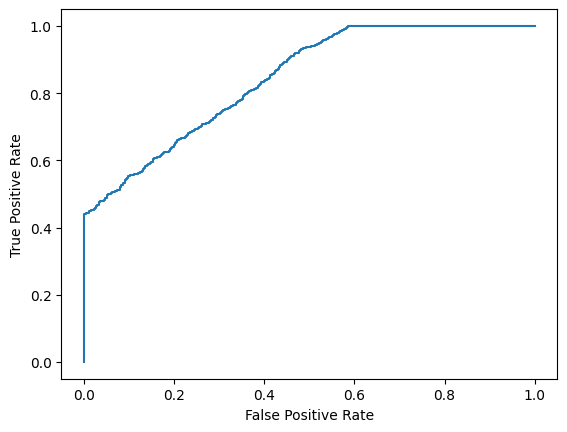

In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000
ratio = 0.95

n_0 = int((1-ratio)*n)
n_1 = int(ratio*n)

y = np.array([0] * n_0 + [1] * n_1)

y_proba_2 = np.array(
    np.random.uniform(0, .7, n_0).tolist() +
    np.random.uniform(.3, 1, n_1).tolist()
)

y_pred_2 = y_proba_2 > .5

print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)

# 混淆矩阵
print('Confusion matrix:')
print(cf_mat)

# 两类各自的分类准确度
print(f'class 0 accuracy: {cf_mat[0, 0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1, 1]/n_1}')

# 绘制ROC曲线


def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(y, y_proba_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')


In [24]:
import numpy as np

# 创建样本
n = 10000
y = np.array([0] * n + [1] * n)

y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.5, .75, n//2).tolist()
)

y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.6, 1, n//2).tolist()
)

print(f'model 1 accuracy score: {accuracy_score(y, y_prob_1>.5)}')
print(f'model 2 accuracy score: {accuracy_score(y, y_prob_2>.5)}')


model 1 accuracy score: 0.75245
model 2 accuracy score: 0.751


model 1 AUC score: 0.7745218100000001


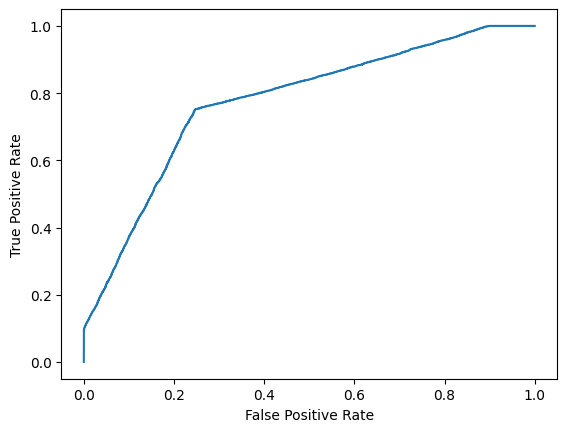

In [25]:
plot_roc_curve(y, y_prob_1)
print(f'model 1 AUC score: {roc_auc_score(y, y_prob_1)}')

model 2 AUC score: 0.8598417599999999


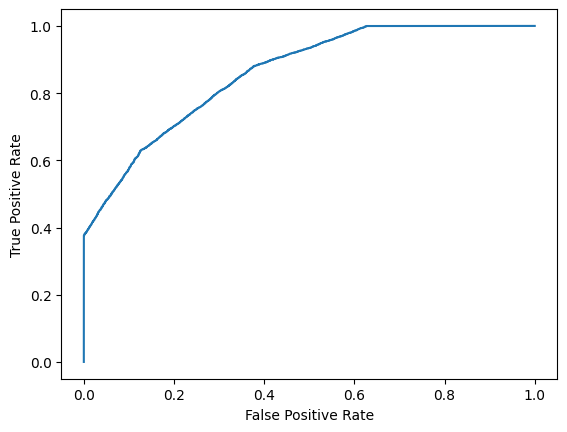

In [26]:
plot_roc_curve(y, y_prob_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_prob_2)}')

# Comprehensive Task

## Iris Classification

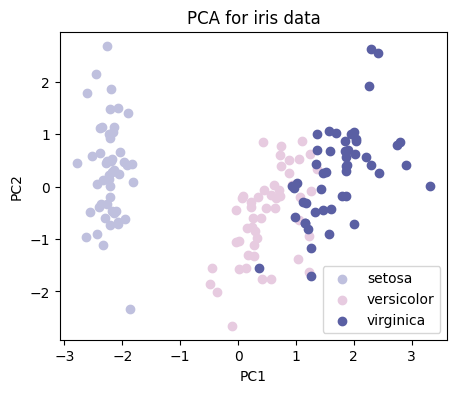

accuracy: 1.0
result: [1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0]
probability:
 [[0.09 0.91]
 [0.08 0.92]
 [0.79 0.21]
 [0.94 0.06]
 [0.9  0.1 ]
 [0.95 0.05]
 [0.87 0.13]
 [0.02 0.98]
 [0.02 0.98]
 [0.29 0.71]
 [0.83 0.17]
 [0.96 0.04]
 [0.74 0.26]
 [0.9  0.1 ]
 [0.12 0.88]
 [0.36 0.64]
 [0.24 0.76]
 [0.69 0.31]
 [0.73 0.27]
 [0.79 0.21]
 [0.92 0.08]
 [0.68 0.32]
 [0.02 0.98]
 [0.01 0.99]
 [0.9  0.1 ]]


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 用PCA对数据降维

# 加载数据
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
names = iris_dataset['target_names']

# 标准化数据
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

# PCA降维，保留主成分个数为2
X_scaled_pca = PCA(2).fit_transform(X_scaled)  # PCA
fig, ax = plt.subplots(figsize=(5, 4))

# 可视化PCA降维结果
colors = ['#BFC0DE', '#E7CBE0', '#5A5FA3']
for i in range(3):
    plt.scatter(X_scaled_pca[y == i, 0], X_scaled_pca[y == i, 1],
                label=names[i], color=colors[i])
plt.legend()
plt.title('PCA for iris data')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()


# 用Logistic回归预测分类

# 数据输入
X = X[y < 2, :2]  # 分类target = 0/1，即setosa与versicolor二分类
y = y[y < 2]

# 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=666, test_size=0.25)

# 模型拟合
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 模型预测
y_predict = lr.predict(X_test)

# 测试集分类准确度
accuracy = metrics.accuracy_score(y_test, y_predict)
print('accuracy:', accuracy)

# 查看逻辑回归预测结果与概率
result = lr.predict(X_test)
print('result:', result)

probability = lr.predict_proba(X_test)
print('probability:\n', probability.round(2))

## Breast Cancer Prediction

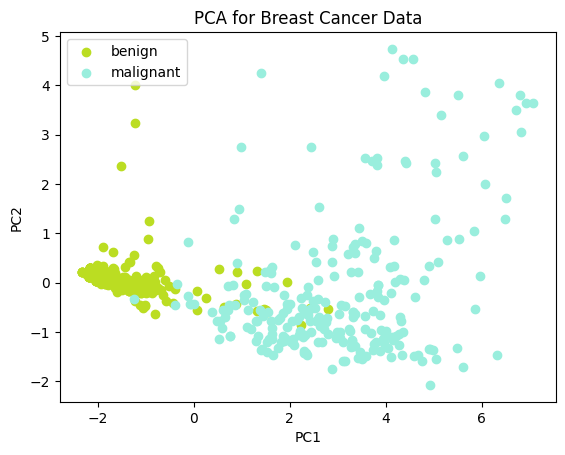

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 读取数据
breast = pd.read_csv("BreastCancer.csv")

# 用中位数填充缺失值
breast['Bare.nuclei'] = breast['Bare.nuclei'].fillna(
    value=breast['Bare.nuclei'].median())

# 将类别变量转化为数值变量
breast['target'] = breast['Class'].map({'benign': 0, 'malignant': 1})
y = breast['target']
names = ['benign', 'malignant']

# 标准化
scale = StandardScaler()
breast.iloc[:, 1:10] = scale.fit_transform(breast.iloc[:, 1:10])
breast.round(3)

# PCA降维
breast_pca = PCA(2).fit_transform(breast.iloc[:, 1:10])
breast_pca

# PCA可视化
colors = ['#BBDD22', '#99EEDD']

for i in range(2):
    plt.scatter(breast_pca[y == i, 0], breast_pca[y == i, 1],
                label=names[i], color=colors[i])

plt.title('PCA for Breast Cancer Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

In [34]:
breast.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class,target
0,1000025,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,benign,0
1,1002945,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912,benign,0
2,1015425,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912,benign,0
3,1016277,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912,benign,0
4,1017023,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,benign,0


In [35]:
breast_pca

array([[-1.45622036, -0.11021043],
       [ 1.46627924, -0.54489351],
       [-1.5793114 , -0.07485359],
       ...,
       [ 3.8253587 , -0.18046559],
       [ 2.26948193, -1.11343514],
       [ 2.66445312, -1.19724198]])